In [639]:
# Dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats
from scipy.stats import sem, ttest_ind

In [430]:
# Add files
experience_data = os.path.join("team_salary_experience.csv")
win_data = os.path.join("team_win_data.csv")
per_data = os.path.join("player_PER.csv")
pos_data = os.path.join("pos_data.csv")
player_ex_data = os.path.join("player_per_updated.csv")

In [431]:
# Read in experience_data csv file
experience_df = pd.read_csv(experience_data)
experience_df.head()

,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,roster_PL,...,roster_EX,roster_SAL,roster_CY,starter_PL,starter_HT (cm),starter_WT (kg),starter_AG,starter_EX,starter_SAL,starter_CY
0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,$4.2M,2.7,ATL,16,...,2.0,$4.2M,2.8,5,201.6,98.6,26.6,3.8,$10.7M,3.2
1,Boston Celtics,12,199.3,101.8,25.5,3.6,$6.8M,2.7,BOS,16,...,3.2,$7.2M,2.9,5,202.2,102.4,25.8,4.4,$12.3M,3.2
2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,$5.2M,2.2,BKN,15,...,3.7,$5.9M,2.4,5,199.2,94.4,25.4,3.8,$8.5M,2.6
3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,$9.5M,2.9,CHA,14,...,4.6,$8.4M,2.9,5,201.2,101.4,28.6,9.0,$16.8M,2.8
4,Chicago Bulls,17,200.7,98.4,24.8,2.4,$3.8M,2.8,CHI,15,...,2.7,$4.2M,3.0,5,203.0,99.4,25.4,3.0,$5.7M,3.4


In [630]:
# experience_df.columns

In [629]:
# print(len(experience_df))

In [434]:
# Read in win_data csv file
win_df = pd.read_csv(win_data)
win_df.head()

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb
0,Toronto Raptors* (1),59,23,0.720,—,111.7,103.9,7.29,East,TOR
1,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East,BOS
2,Philadelphia 76ers* (3),52,30,0.634,7,109.8,105.3,4.30,East,PHI
3,Cleveland Cavaliers* (4),50,32,0.610,9,110.9,109.9,0.59,East,CLE
4,Indiana Pacers* (5),48,34,0.585,11,105.6,104.2,1.18,East,IND


In [628]:
# win_df.columns

In [627]:
# print(len(win_df))

In [437]:
# Read in per_data csv file
per_df = pd.read_csv(per_data)
per_df.head()

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM
0,49.0,John Wall,41.0,34.4,0.515,29.7,11.9,30.3,1.8,10.2,6.0,19.20,172.5,5.8,WAS
1,56.0,Bradley Beal,82.0,36.3,0.564,16.7,9.6,26.8,2.3,11.5,6.9,18.51,355.7,11.9,WAS
2,57.0,Otto Porter Jr.,77.0,31.6,0.602,13.4,6.4,17.7,4.8,18.1,11.4,18.37,285.6,9.5,WAS
3,134.0,Tomas Satoransky,73.0,22.5,0.615,36.0,10.4,14.8,5.0,11.1,8.0,15.35,119.0,4.0,WAS
4,151.0,Marcin Gortat,82.0,25.3,0.546,17.1,11.2,15.2,9.9,24.0,17.0,14.70,127.0,4.2,WAS


In [626]:
# per_df.columns

In [439]:
# Rename TEAM column to Team_Abb
per_df = per_df.rename(columns={'TEAM': 'Team_Abb'})
per_df.head()

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,Team_Abb
0,49.0,John Wall,41.0,34.4,0.515,29.7,11.9,30.3,1.8,10.2,6.0,19.20,172.5,5.8,WAS
1,56.0,Bradley Beal,82.0,36.3,0.564,16.7,9.6,26.8,2.3,11.5,6.9,18.51,355.7,11.9,WAS
2,57.0,Otto Porter Jr.,77.0,31.6,0.602,13.4,6.4,17.7,4.8,18.1,11.4,18.37,285.6,9.5,WAS
3,134.0,Tomas Satoransky,73.0,22.5,0.615,36.0,10.4,14.8,5.0,11.1,8.0,15.35,119.0,4.0,WAS
4,151.0,Marcin Gortat,82.0,25.3,0.546,17.1,11.2,15.2,9.9,24.0,17.0,14.70,127.0,4.2,WAS


In [666]:
# Groupby Team_Abb and PER Score (calculate average team PER score)
team_per = per_df.groupby("Team_Abb")["PER"].mean()
# team_per.head()

In [625]:
# print(len(team_per))

In [673]:
# Groupby Team_Abb and other Stats (calculate average team stats)
team_drr = per_df.groupby("Team_Abb")["DRR"].mean()
team_rebr = per_df.groupby("Team_Abb")["REBR"].mean()
team_ast = per_df.groupby("Team_Abb")["AST"].mean()
team_orr = per_df.groupby("Team_Abb")["ORR"].mean()
team_to = per_df.groupby("Team_Abb")["TO"].mean()
team_ts = per_df.groupby("Team_Abb")["TS%"].mean()
# team_ts.head()

In [674]:
# Creating a new DataFrame for team_per
team_per_df = pd.DataFrame({"PER": team_per,
                           "DRR": team_drr,
                           "REBR": team_rebr,
                           "AST": team_ast,
                           "ORR": team_orr,
                           "TO": team_to,
                           "TS%": team_ts})

# Reset Index
team_per_df.reset_index(level=0, inplace=True)

team_per_df.head()

,Team_Abb,AST,DRR,ORR,PER,REBR,TO,TS%
0,ATL,17.581818,15.718182,4.963636,13.528182,10.345455,11.645455,0.552091
1,BKN,16.145455,14.754545,3.809091,13.388182,9.254545,10.372727,0.554000
2,BOS,16.476923,14.053846,3.938462,13.978462,9.069231,10.984615,0.537923
3,CHA,16.116667,15.200000,4.283333,13.794167,9.641667,9.416667,0.535333
4,CHI,17.028571,15.385714,4.192857,12.400714,9.600000,10.264286,0.523000


In [675]:
# Merge experience_df and win_df on Team_Abb
experience_win_merge = pd.merge(experience_df, win_df, on="Team_Abb")
experience_win_merge.head()

,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,roster_PL,...,starter_CY,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference
0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,$4.2M,2.7,ATL,16,...,3.2,Atlanta Hawks (15),24,58,0.293,35,103.4,108.8,-5.30,East
1,Boston Celtics,12,199.3,101.8,25.5,3.6,$6.8M,2.7,BOS,16,...,3.2,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East
2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,$5.2M,2.2,BKN,15,...,2.6,Brooklyn Nets (12),28,54,0.341,31,106.6,110.3,-3.67,East
3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,$9.5M,2.9,CHA,14,...,2.8,Charlotte Hornets (10),36,46,0.439,23,108.2,108.0,0.07,East
4,Chicago Bulls,17,200.7,98.4,24.8,2.4,$3.8M,2.8,CHI,15,...,3.4,Chicago Bulls (13),27,55,0.329,32,102.9,110.0,-6.84,East


In [676]:
# print(len(experience_win_merge))

In [677]:
# Merge experience_win_merge and team_per_df on Team_Abb
ex_win_per_merge = pd.merge(experience_win_merge, team_per_df, on="Team_Abb")
ex_win_per_merge.head()

,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,roster_PL,...,PA/G,SRS,conference,AST,DRR,ORR,PER,REBR,TO,TS%
0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,$4.2M,2.7,ATL,16,...,108.8,-5.30,East,17.581818,15.718182,4.963636,13.528182,10.345455,11.645455,0.552091
1,Boston Celtics,12,199.3,101.8,25.5,3.6,$6.8M,2.7,BOS,16,...,100.4,3.23,East,16.476923,14.053846,3.938462,13.978462,9.069231,10.984615,0.537923
2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,$5.2M,2.2,BKN,15,...,110.3,-3.67,East,16.145455,14.754545,3.809091,13.388182,9.254545,10.372727,0.554000
3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,$9.5M,2.9,CHA,14,...,108.0,0.07,East,16.116667,15.200000,4.283333,13.794167,9.641667,9.416667,0.535333
4,Chicago Bulls,17,200.7,98.4,24.8,2.4,$3.8M,2.8,CHI,15,...,110.0,-6.84,East,17.028571,15.385714,4.192857,12.400714,9.600000,10.264286,0.523000


In [678]:
# print(len(ex_win_per_merge))

In [679]:
# ex_win_per_merge.columns

In [680]:
# Groupby Team_Abb and rotation_EX (calculate average team experience in years)
rotation_ex = ex_win_per_merge.groupby("Team_Abb")["rotation_EX"].mean()
# rotation_ex.head()

In [681]:
# Groupby Team_Abb and roster_EX (calculate average team experience in years)
roster_ex = ex_win_per_merge.groupby("Team_Abb")["roster_EX"].mean()
# roster_ex.head()

In [682]:
# Groupby Team_Abb and starter_EX (calculate average team experience in years)
starter_ex = ex_win_per_merge.groupby("Team_Abb")["starter_EX"].mean()
# starter_ex.head()

In [683]:
# Groupby Team_Abb and Wins ('W')
team_total_wins = ex_win_per_merge.groupby("Team_Abb")["W"].max()
# team_total_wins.head()

In [684]:
# Groupby Team_Abb and Wins ('W')
average_per = ex_win_per_merge.groupby("Team_Abb")["PER"].mean()
# average_per.head()

In [685]:
# Groupby Team_Abb and Wins ('W')
team_conf = ex_win_per_merge.groupby("Team_Abb")["conference"].max()
# team_conf.head()

In [686]:
# Creating a new DataFrame for team_per
experience_summary_df = pd.DataFrame({"rotation_EX": rotation_ex,
                                     "roster_EX": roster_ex,
                                     "starter_EX": starter_ex,
                                     "W": team_total_wins,
                                     "PER": average_per,
                                     "Conference": team_conf,
                                     "DRR": team_drr,
                                     "REBR": team_rebr,
                                     "AST": team_ast,
                                      "ORR": team_orr,
                                      "TO": team_to,
                                      "TS%": team_ts})

# Reset Index
experience_summary_df.reset_index(level=0, inplace=True)
experience_summary_df = experience_summary_df.sort_values('W', ascending = False).reset_index(drop=True)

experience_summary_df.head()

,Team_Abb,AST,Conference,DRR,ORR,PER,REBR,TO,TS%,W,roster_EX,rotation_EX,starter_EX
0,HOU,13.133333,West,16.308333,4.791667,15.838333,10.600000,10.175000,0.581167,65,7.6,8.5,9.0
1,TOR,16.609091,East,15.300000,4.690909,15.818182,10.100000,9.818182,0.574545,59,3.9,4.6,6.4
2,GSW,20.733333,West,15.500000,5.140000,16.577333,10.686667,10.866667,0.592267,58,7.1,7.4,8.6
3,BOS,16.476923,East,14.053846,3.938462,13.978462,9.069231,10.984615,0.537923,55,3.2,3.6,4.4
4,PHI,17.561538,East,14.961538,5.023077,14.576923,10.153846,10.330769,0.563846,52,4.3,4.6,3.4


Text(0.5,1,'Team Roster Experience Vs. Team 2017-2018 Win Record')

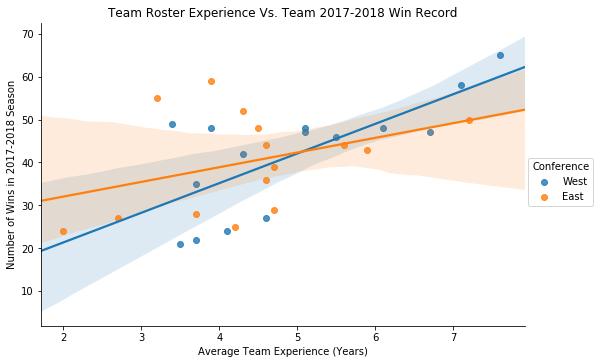

In [566]:
# Create graph that shows average team roster experience vs. team win record (seperate conferences)
roster = sns.lmplot(x="roster_EX", y="W", hue="Conference", data=experience_summary_df, aspect=1.5)
roster.set(xlabel="Average Team Experience (Years)", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Roster Experience Vs. Team 2017-2018 Win Record")

In [646]:
# Run the t-test
(t_stat, p) = ttest_ind(experience_summary_df["roster_EX"], experience_summary_df["W"], equal_var=False)
if p < 0.05:
    print("The differences between the average team roster experience and team wins are significant.")
else:
    print("The differences between average the team roster experience and team wins are due to chance.")
    
print(p)

The differences between the average team roster experience and team wins are significant.
2.8513170283190706e-16


Text(0.5,1,'Team Rotation Experience Vs. Team 2017-2018 Win Record')

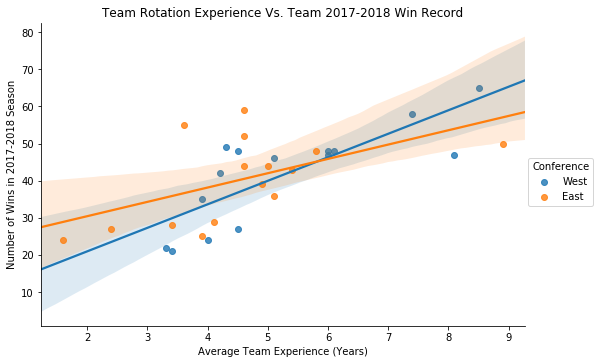

In [565]:
# Create graph showing team roation experience vs. team win record (seperate by conference)
rotation = sns.lmplot(x="rotation_EX", y="W", hue="Conference", data=experience_summary_df, aspect=1.5)
rotation.set(xlabel="Average Team Experience (Years)", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Rotation Experience Vs. Team 2017-2018 Win Record")

In [644]:
# Run the t-test
(t_stat, p) = ttest_ind(experience_summary_df["rotation_EX"], experience_summary_df["W"], equal_var=False)
if p < 0.05:
    print("The differences between the average team rotation experience and team wins are significant.")
else:
    print("The differences between average the team rotation experience and team wins are due to chance.")
    
print(p)

The differences between the average team rotation experience and team wins are significant.
2.8098007379631094e-16


Text(0.5,1,'Team Starter Experience Vs. Team 2017-2018 Win Record')

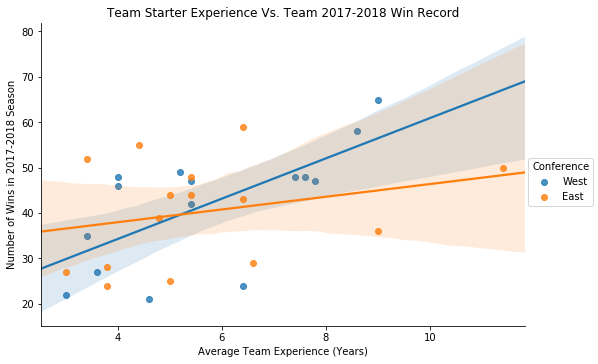

In [567]:
# Create graph showing team starter experience vs. team win record (seperate by conference)
starter = sns.lmplot(x="starter_EX", y="W", hue="Conference", data=experience_summary_df, aspect=1.5)
starter.set(xlabel="Average Team Experience (Years)", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Starter Experience Vs. Team 2017-2018 Win Record")

In [645]:
# Run the t-test
(t_stat, p) = ttest_ind(experience_summary_df["starter_EX"], experience_summary_df["W"], equal_var=False)
if p < 0.05:
    print("The differences between the average team starter experience and team wins are significant.")
else:
    print("The differences between average the team starter experience and team wins are due to chance.")

print(p)

The differences between the average team starter experience and team wins are significant.
3.801811656055239e-16


In [609]:
# Transpose experience_summary_df DataFrame and create new DataFrame
# Create new lists for new dataframe
team = []
ex = []
years = []
wins = []
new_type = ["roster_EX", "rotation_EX", "starter_EX"]

# create a loop to append data to new lists
for row in range(30):
#     print(experience_summary_df.iloc[row][0])
    for ex_type in range(len(new_type)):
        team.append(experience_summary_df.iloc[row][0])
        ex.append(new_type[ex_type])
        years.append(experience_summary_df.iloc[row][4 + ex_type])
        wins.append(experience_summary_df.iloc[row][3])

# create new dataframe
df = pd.DataFrame({"Team_Abb": team,
                  "Ex_type": ex,
                  "Avg_Years": years,
                  "W": wins})

df.head()

,Avg_Years,Ex_type,Team_Abb,W
0,7.6,roster_EX,HOU,65
1,8.5,rotation_EX,HOU,65
2,9.0,starter_EX,HOU,65
3,3.9,roster_EX,TOR,59
4,4.6,rotation_EX,TOR,59


Text(25.3806,0.5,'Team Average Years of Experience')

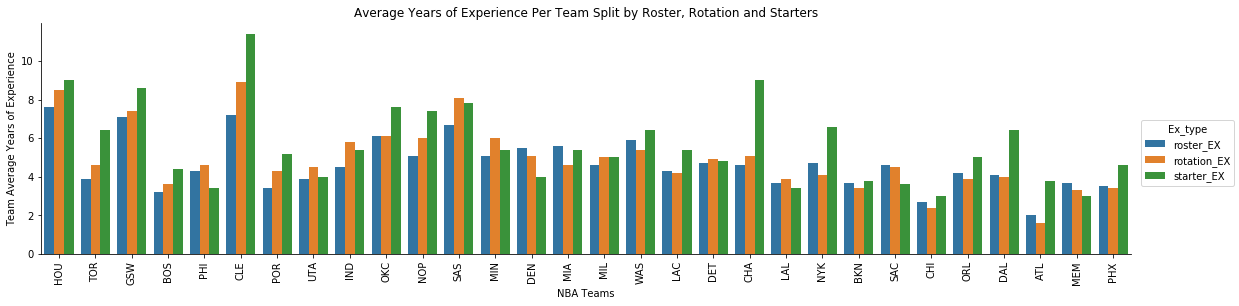

In [610]:
# Create bar graph for each team in desending order from most team wins to least team wins
# Each team shows average roster, roation, and starter experience
g = sns.factorplot(x="Team_Abb", y="Avg_Years",
                   hue="Ex_type",
                   data=df, kind="bar",
                   size=4, aspect=4)
plt.xticks(rotation=90)
plt.title("Average Years of Experience Per Team Split by Roster, Rotation and Starters")
plt.xlabel("NBA Teams")
plt.ylabel("Team Average Years of Experience")


Text(26.5614,0.5,'Average Years of Experience')

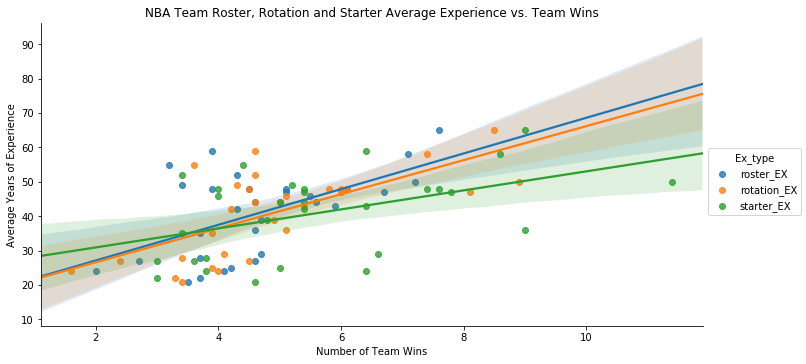

In [632]:
# Create scatter plot for each team in desending order from most team wins to least team wins
# Each team shows average roster, roation, and starter experience
sns.lmplot(x='Avg_Years', y='W', hue='Ex_type', data=df, aspect=2)
plt.title("NBA Team Roster, Rotation and Starter Average Experience vs. Team Wins")
plt.xlabel("Number of Team Wins")
plt.ylabel("Average Years of Experience")

In [460]:
# Read in player_ex_data csv file
player_ex_df = pd.read_csv(player_ex_data)
player_ex_df.head()

,RK,PLAYER,years_in_league,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM
0,99.0,Aaron Gordon,3.0,58.0,32.9,0.530,11.3,8.9,23.2,5.0,21.5,13.2,16.51,142.8,4.8,ORL
1,351.0,Abdel Nader,0.0,48.0,10.9,0.439,11.5,15.0,16.2,2.8,12.0,7.4,5.14,-41.8,-1.4,BOS
2,69.0,Al Horford,10.0,72.0,31.6,0.575,26.6,10.3,18.7,5.0,20.3,12.8,17.63,208.4,6.9,BOS
3,247.0,Al-Farouq Aminu,7.0,69.0,30.0,0.522,10.8,10.1,14.1,5.2,22.3,13.8,12.02,16.0,0.5,POR
4,205.0,Alec Burks,6.0,64.0,16.5,0.527,11.3,10.1,21.2,2.1,18.4,10.3,13.13,41.6,1.4,UTA


In [535]:
# Read in pos_data csv file
pos_df = pd.read_csv(pos_data)
# pos_df.head()

In [463]:
# Rename NAME column to PLAYER
pos_df = pos_df.rename(columns={'NAME': 'PLAYER'})
# del pos_df['Unnamed: 3']
pos_df.head()

,PLAYER,POS,Team_Abb,team_wins
0,Kent Bazemore,SG,ATL,24
1,DeAndre' Bembry,SF,ATL,24
2,Antonius Cleveland,SG,ATL,24
3,John Collins,PF,ATL,24
4,Dewayne Dedmon,C,ATL,24


In [464]:
# Merge pos_data and player_ex_data on PLAYER
ex_pos_df = pd.merge(pos_df, player_ex_df, on='PLAYER')
ex_pos_df.head()

,PLAYER,POS,Team_Abb,team_wins,RK,years_in_league,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM
0,Kent Bazemore,SG,ATL,24,157.0,5.0,65.0,27.5,0.547,19.8,13.7,22.1,1.6,13.9,7.7,14.51,107.0,3.6,ATL
1,John Collins,PF,ATL,24,58.0,0.0,74.0,24.1,0.620,11.8,12.7,17.0,11.0,22.8,16.9,18.33,181.8,6.1,ATL
2,Dewayne Dedmon,C,ATL,24,122.0,4.0,62.0,24.9,0.599,13.0,12.4,16.2,7.2,28.1,17.7,15.85,120.8,4.0,ATL
3,Malcolm Delaney,PG,ATL,24,280.0,1.0,54.0,18.8,0.519,29.4,11.9,17.4,1.0,10.0,5.5,10.67,-5.0,-0.2,ATL
4,Tyler Dorsey,SG,ATL,24,296.0,0.0,56.0,17.4,0.494,15.0,7.0,19.2,2.0,12.9,7.4,10.05,-6.5,-0.2,ATL


In [540]:
# Groupby Team_Abb and years_in_league (total years of experience )
total_years_ex = ex_pos_df.groupby("Team_Abb")["years_in_league"].mean()
team_wins = ex_pos_df.groupby("Team_Abb")["team_wins"].max()
# total_years_ex.head()

In [512]:
# Creating a new DataFrame 
total_ex_df = pd.DataFrame({"total_ex": total_years_ex,
                            "team_wins": team_wins})

# Reset Index
total_ex_df.reset_index(level=0, inplace=True)
total_ex_df= total_ex_df.sort_values('total_ex', ascending = False).reset_index(drop=True)

total_ex_df.head()

,Team_Abb,team_wins,total_ex
0,GSW,58,105.0
1,HOU,65,98.0
2,SAS,47,94.0
3,CLE,50,94.0
4,OKC,48,73.0


In [541]:
# Merge total_ex_df and win_df to create new dataframe
new_merge = pd.merge(total_ex_df, win_df, on="Team_Abb")
new_merge.head()

,Team_Abb,team_wins,total_ex,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference
0,GSW,58,105.0,Golden State Warriors* (2),58,24,0.707,7,113.5,107.5,5.79,West
1,HOU,65,98.0,Houston Rockets* (1),65,17,0.793,—,112.4,103.9,8.21,West
2,SAS,47,94.0,San Antonio Spurs* (7),47,35,0.573,18,102.7,99.8,2.89,West
3,CLE,50,94.0,Cleveland Cavaliers* (4),50,32,0.610,9,110.9,109.9,0.59,East
4,OKC,48,73.0,Oklahoma City Thunder* (4),48,34,0.585,17,107.9,104.4,3.42,West


Text(0.5,1,'Sum of Team Experience Vs. Team Wins')

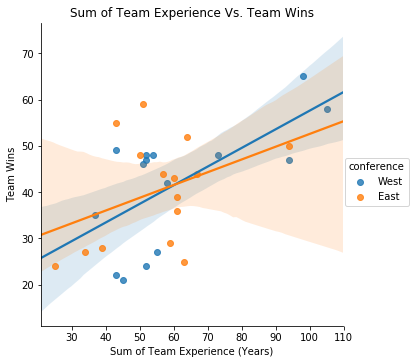

In [544]:
# PLAYER EXPERIENCE VS. VA
teamEx_vs_W = sns.lmplot(x="total_ex", y="team_wins", hue="conference", data=new_merge)
teamEx_vs_W.set(xlabel="Sum of Team Experience (Years)", ylabel="Team Wins")
plt.title("Sum of Team Experience Vs. Team Wins")


In [ ]:
# Run the t-test
(t_stat, p) = ttest_ind(new_merge["total_ex"], new_merge["team_wins"], equal_var=False)
# if p < 0.05:
#     print("The differences between the sum of the team's experience and team wins are significant.")
# else:
#     print("The differences between average the total team experience and team wins are due to chance.")
print(p)

In [650]:
# Group the ex_pos_df by player position and player PER score
group1 = ex_pos_df[ex_pos_df["POS"] == "C"]["PER"]
group2 = ex_pos_df[ex_pos_df["POS"] == "PF"]["PER"]
group3 = ex_pos_df[ex_pos_df["POS"] == "SF"]["PER"]
group4 = ex_pos_df[ex_pos_df["POS"] == "SG"]["PER"]
group5 = ex_pos_df[ex_pos_df["POS"] == "PG"]["PER"]
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=18.16331907579914, pvalue=1.50674316875242e-13)

In [655]:
# Group by conference and team sum of all players experience 
group5 = new_merge[new_merge["conference"] == "West"]["total_ex"]
group6 = new_merge[new_merge["conference"] == "East"]["total_ex"]
 # Perform the ANOVA
stats.f_oneway(group5, group6)


F_onewayResult(statistic=0.6480103908371708, pvalue=0.4276079499956589)

Text(0.5,1,'Team Defensive Rebounds Vs. Team 2017-2018 Win Record')

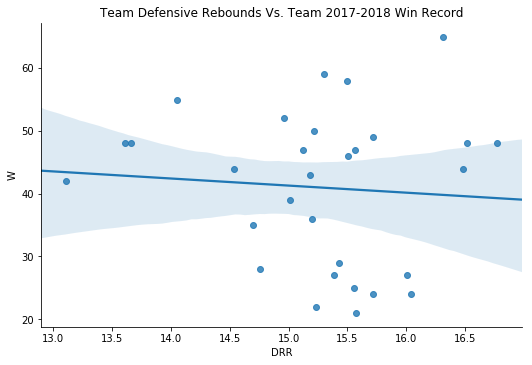

In [695]:
# Create graph that shows average team DRR vs. team win record (seperate conferences)
ddr_vs_wins = sns.lmplot(x="DRR", y="W", data=experience_summary_df, aspect=1.5)
roster.set(xlabel="Average Team Defensive Rebounds", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Defensive Rebounds Vs. Team 2017-2018 Win Record")

In [699]:
# Run the t-test
(t_stat, p) = ttest_ind(experience_summary_df["DRR"], experience_summary_df["W"], equal_var=False)
if p < 0.05:
    print("The differences between the average team defensive rebounding and team wins are significant.")
else:
    print("The differences between average the team defensive rebounding and team wins are due to chance.")
    
print(p)

The differences between the average team defensive rebounding and team wins are significant.
2.1824212037290394e-12


Text(0.5,1,'Team Average Assists Vs. Team 2017-2018 Win Record')

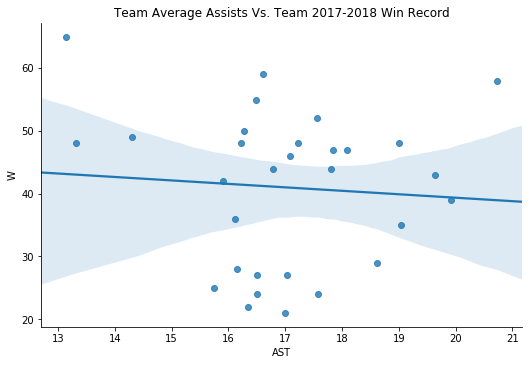

In [694]:
# Create graph that shows average team AST vs. team win record (seperate conferences)
ddr_vs_wins = sns.lmplot(x="AST", y="W", data=experience_summary_df, aspect=1.5)
roster.set(xlabel="Average Team Assits", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Average Assists Vs. Team 2017-2018 Win Record")

In [700]:
# Run the t-test
(t_stat, p) = ttest_ind(experience_summary_df["AST"], experience_summary_df["W"], equal_var=False)
if p < 0.05:
    print("The differences between the average team assists and team wins are significant.")
else:
    print("The differences between average the team assists and team wins are due to chance.")
    
print(p)

The differences between the average team assists and team wins are significant.
9.915180326894703e-12


Text(0.5,1,'Team Average Rebounding Rate Vs. Team 2017-2018 Win Record')

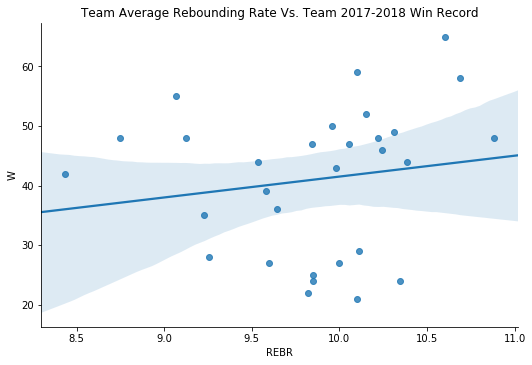

In [691]:
# Create graph that shows average team REBR vs. team win record (seperate conferences)
ddr_vs_wins = sns.lmplot(x="REBR", y="W", data=experience_summary_df, aspect=1.5)
roster.set(xlabel="Average Team rebounding Rate", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Average Rebounding Rate Vs. Team 2017-2018 Win Record")

In [701]:
# Run the t-test
(t_stat, p) = ttest_ind(experience_summary_df["REBR"], experience_summary_df["W"], equal_var=False)
if p < 0.05:
    print("The differences between the average team rebounding rate and team wins are significant.")
else:
    print("The differences between average the team rebounding rate and team wins are due to chance.")
    
print(p)

The differences between the average team rebounding rate and team wins are significant.
2.0287639176208952e-14


Text(0.5,1,'Team Average True Shooting Percentage Vs. Team 2017-2018 Win Record')

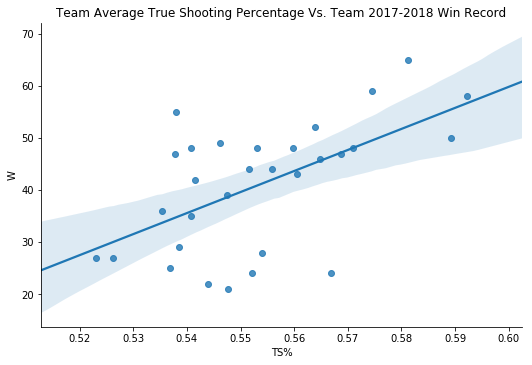

In [696]:
# Create graph that shows average team TS% vs. team win record (seperate conferences)
ddr_vs_wins = sns.lmplot(x="TS%", y="W", data=experience_summary_df, aspect=1.5)
roster.set(xlabel="Average Team True Shooting Percentage", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Average True Shooting Percentage Vs. Team 2017-2018 Win Record")

In [702]:
# Run the t-test
(t_stat, p) = ttest_ind(experience_summary_df["TS%"], experience_summary_df["W"], equal_var=False)
if p < 0.05:
    print("The differences between the average team true shooting percentage and team wins are significant.")
else:
    print("The differences between average the team true shooting percentage and team wins are due to chance.")
    
print(p)

The differences between the average team true shooting percentage and team wins are significant.
2.320558429918398e-17


Text(0.5,1,'Team Average Turnovers Vs. Team 2017-2018 Win Record')

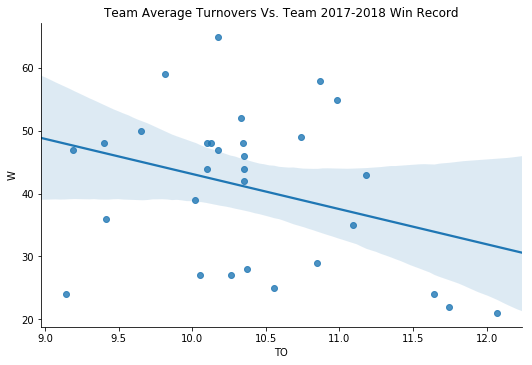

In [697]:
# Create graph that shows average team TO vs. team win record (seperate conferences)
ddr_vs_wins = sns.lmplot(x="TO", y="W", data=experience_summary_df, aspect=1.5)
roster.set(xlabel="Average Team Turnovers", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Average Turnovers Vs. Team 2017-2018 Win Record")

In [703]:
# Run the t-test
(t_stat, p) = ttest_ind(experience_summary_df["TO"], experience_summary_df["W"], equal_var=False)
if p < 0.05:
    print("The differences between the average team turnovers and team wins are significant.")
else:
    print("The differences between average team turnovers and team wins are due to chance.")
    
print(p)

The differences between the average team turnovers and team wins are significant.
3.039142056261396e-14


Text(0.5,1,'Team Average Offensive ReboundingVs. Team 2017-2018 Win Record')

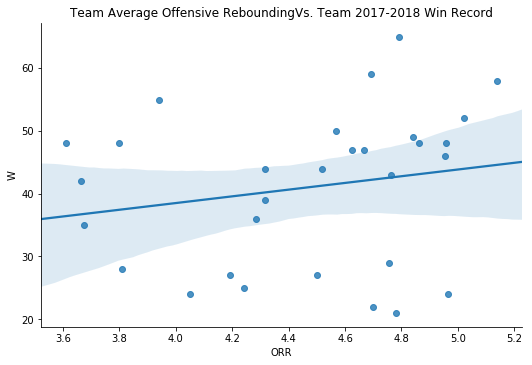

In [698]:
# Create graph that shows average team ORR vs. team win record (seperate conferences)
ddr_vs_wins = sns.lmplot(x="ORR", y="W", data=experience_summary_df, aspect=1.5)
roster.set(xlabel="Average Team Offensive Rebounding", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Average Offensive ReboundingVs. Team 2017-2018 Win Record")

In [704]:
# Run the t-test
(t_stat, p) = ttest_ind(experience_summary_df["ORR"], experience_summary_df["W"], equal_var=False)
if p < 0.05:
    print("The differences between the average team offensive rebounding and team wins are significant.")
else:
    print("The differences between average the team offensive rebounding and team wins are due to chance.")
    
print(p)

The differences between the average team offensive rebounding and team wins are significant.
3.307153713464205e-16
